In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
# Load the dataset
data = pd.read_csv('accidents_2017.csv')

# Display the first few rows of the dataset
print(data.head())


                Id District Name           Neighborhood Name  \
0  2017S008429           Unknown                     Unknown   
1  2017S007316           Unknown                     Unknown   
2  2017S010210           Unknown                     Unknown   
3  2017S006364           Unknown                     Unknown   
4  2017S004615        Sant Martí  el Camp de l'Arpa del Clot   

                                              Street   Weekday      Month  \
0  Número 27                                     ...    Friday    October   
1  Número 3 Zona Franca / Número 50 Zona Franca  ...    Friday  September   
2  Litoral (Besòs)                               ...    Friday   December   
3  Número 3 Zona Franca                          ...    Friday       July   
4  Las Navas de Tolosa                           ...  Thursday        May   

   Day  Hour Part of the day  Mild injuries  Serious injuries  Victims  \
0   13     8         Morning              2                 0        2   
1   

In [3]:
# Data cleaning and preparation
data['Date'] = pd.to_datetime(data['Day'].astype(str) + '-' + data['Month'] + '-' + '2017')
data['Time'] = pd.to_datetime(data['Hour'], format='%H').dt.time
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month_name()

# EDA - Descriptive statistics
print(data.describe())

                Day          Hour  Mild injuries  Serious injuries  \
count  10339.000000  10339.000000   10339.000000      10339.000000   
mean      15.775994     13.811394       1.154174          0.023310   
min        1.000000      0.000000       0.000000          0.000000   
25%        8.000000     10.000000       1.000000          0.000000   
50%       16.000000     14.000000       1.000000          0.000000   
75%       23.000000     18.000000       1.000000          0.000000   
max       31.000000     23.000000      10.000000          4.000000   
std        8.763455      5.316490       0.742294          0.163803   

            Victims  Vehicles involved     Longitude      Latitude  \
count  10339.000000       10339.000000  10339.000000  10339.000000   
mean       1.178644           1.920979      2.162832     41.399346   
min        0.000000           0.000000      2.091855     41.323094   
25%        1.000000           2.000000      2.144985     41.386288   
50%        1.000000

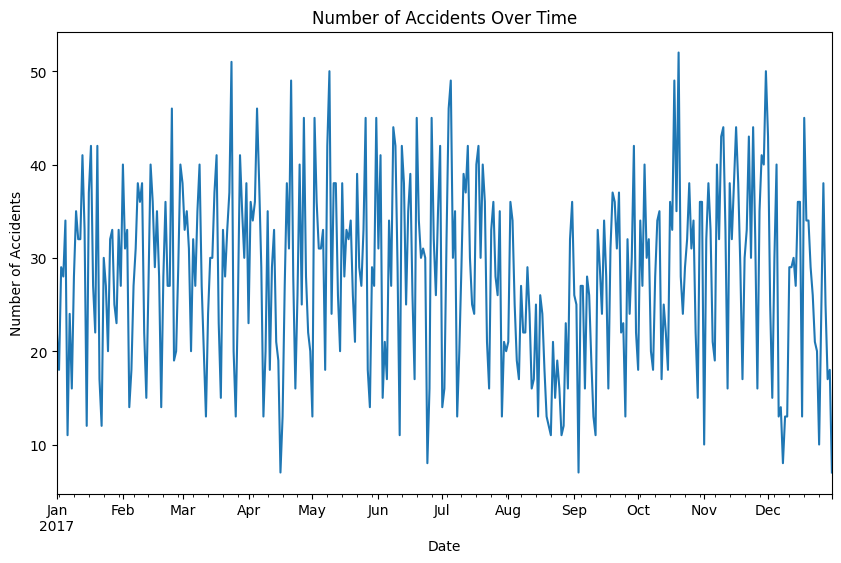

In [4]:
# Visualization - Time Series Analysis
plt.figure(figsize=(10, 6))
data['Date'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

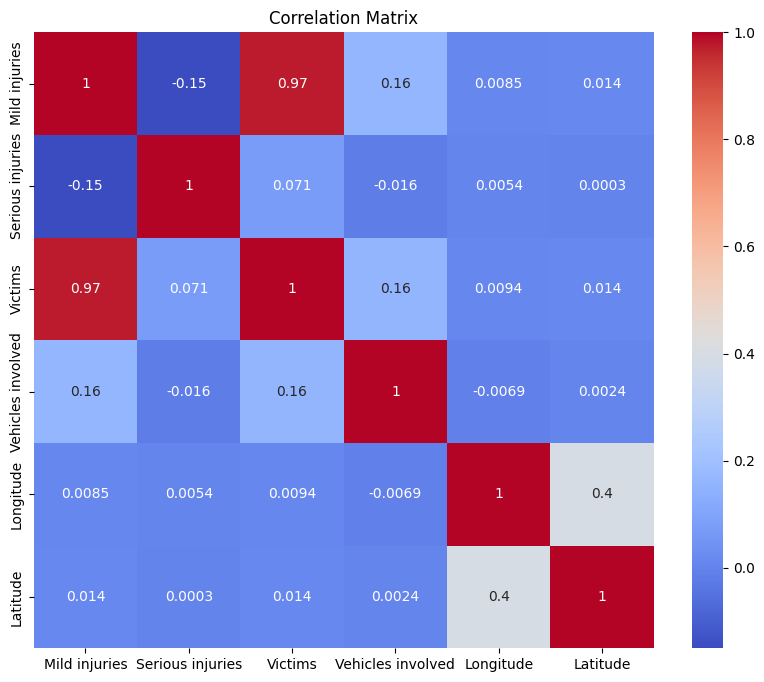

In [7]:
# Select numeric columns for correlation analysis
numeric_columns = ['Mild injuries', 'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude', 'Latitude']
numeric_data = data[numeric_columns]

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

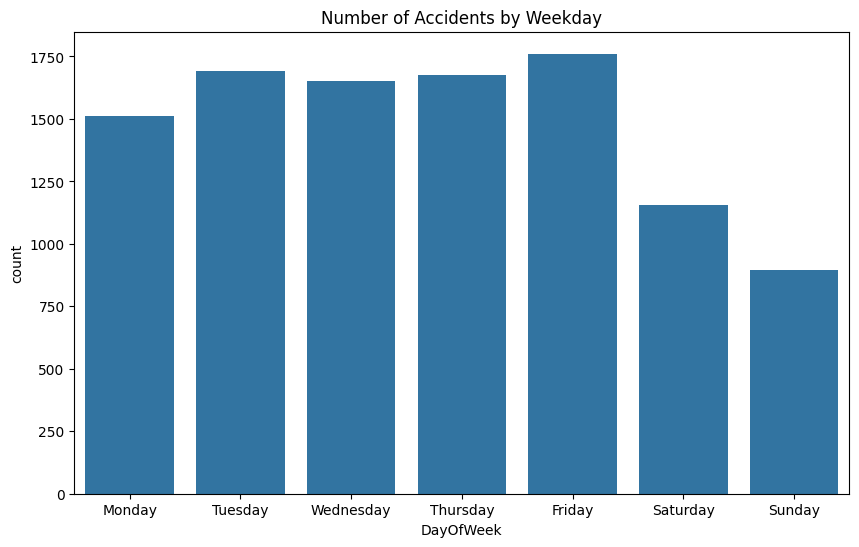

In [8]:
# Bar Plot - Accidents by Weekday
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Accidents by Weekday')
plt.show()

In [9]:
# Visualization - Heatmap of Accidents
map_osm = folium.Map(location=[41.3851, 2.1734], zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map_osm)
map_osm.save('heatmap.html')